In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'OR'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

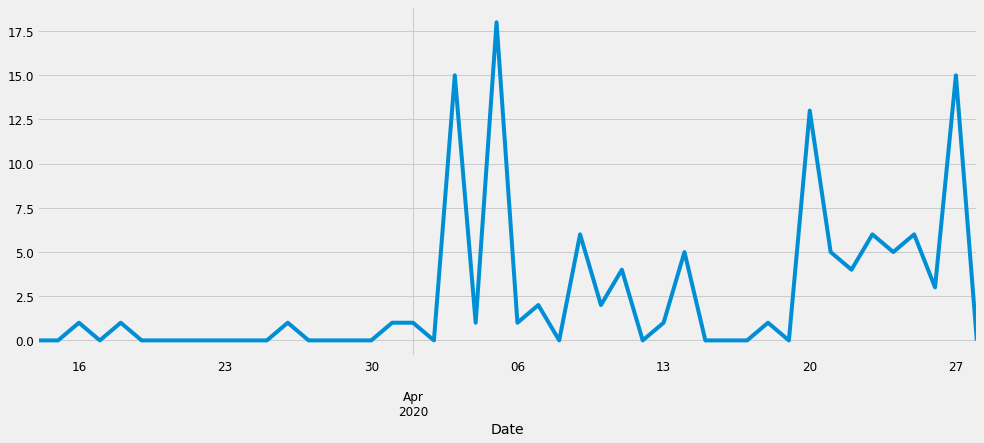

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

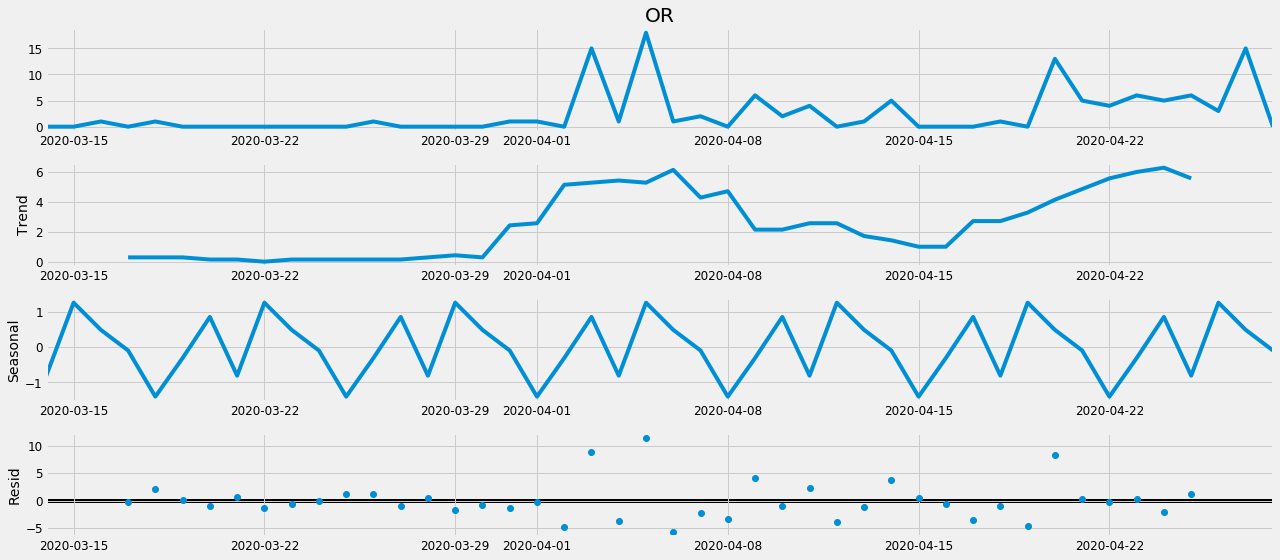

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:276.8540776611094
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1506.112732814653
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:224.7266963077789
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:133.45016593302566
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:220.79947952854414


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1218.1321893181066
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:128.015880156545
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:123.78153940255409
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:272.16922986333
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1462.5941651535304
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:220.96050495907838
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:129.40045193428554
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:221.86326001896313
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1459.731505352901
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:126.96553553862412
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:119.29018680774662
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:288.82588751821817


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1372.7040164000382
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:241.4517998914281
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:138.3192021666485
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:227.59956467787563


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1246.0776970328802
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:123.90862412674304
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:120.44739007729373
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:255.39944997149306


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1358.8329433258866
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:215.78971200638316
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:121.81198119943292
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:206.17569246375967


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1293.956677629544
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:117.86621552287001
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:109.17952064638399
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:275.6370011286759


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1473.8281492109643
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:226.7235912494364
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:134.83418573635564
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:215.3308450409491


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1470.8135435918111
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:119.83192085268709
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:121.81871560888395
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:261.8333358820391
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1464.5941651535304
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:221.3870222719485
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:127.9072540865805
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:206.80050187351813
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1461.731505352901
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:119.44434134105805
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:116.55702574234506
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:258.05179427349793


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.5480569575566
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:216.75934097040135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:125.90251554292952
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:200.5085647904185


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1032.295895794482
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:115.85407214970517
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:117.7969806142397
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:252.82208432477006


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1344.29542840862
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:212.99865686368076
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:122.0647736312823
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:199.82289695588275


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1280.1094198366768
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:114.32551467904722
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:110.615168990389


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7183      0.234     -3.065      0.002      -1.178      -0.259
ma.L1         -0.0606      0.339     -0.179      0.858      -0.725       0.604
ma.S.L12      -1.0000   1.55e+04  -6.44e-05      1.000   -3.04e+04    3.04e+04
sigma2        16.6039   2.58e+05   6.44e-05      1.000   -5.05e+05    5.05e+05


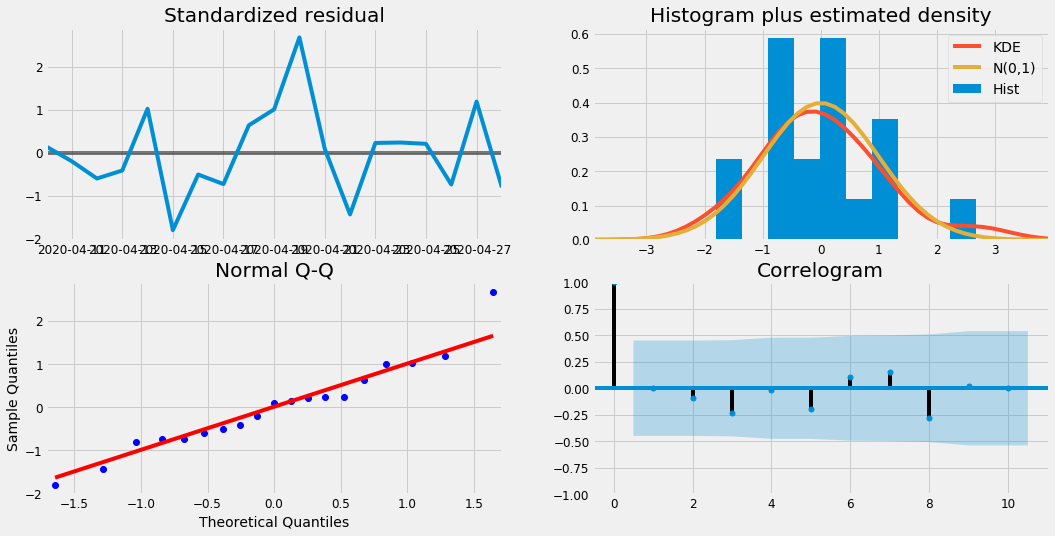

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

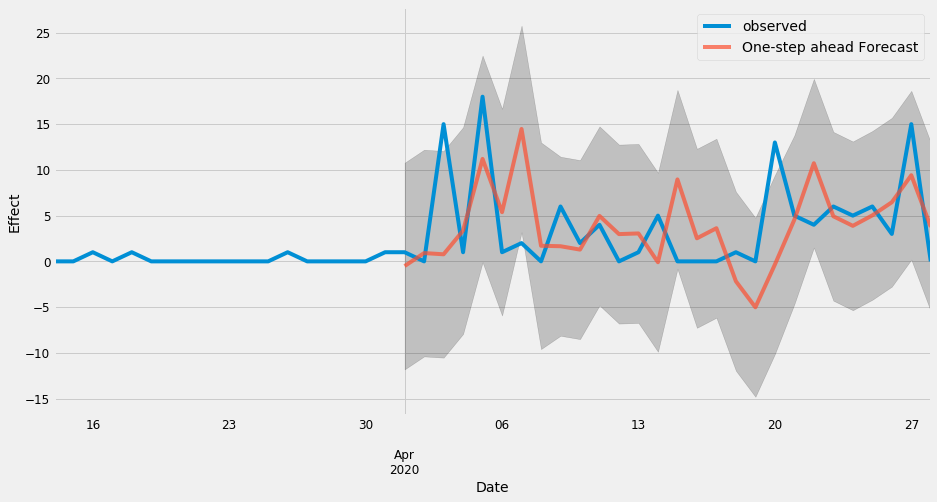

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 32.64


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 5.71


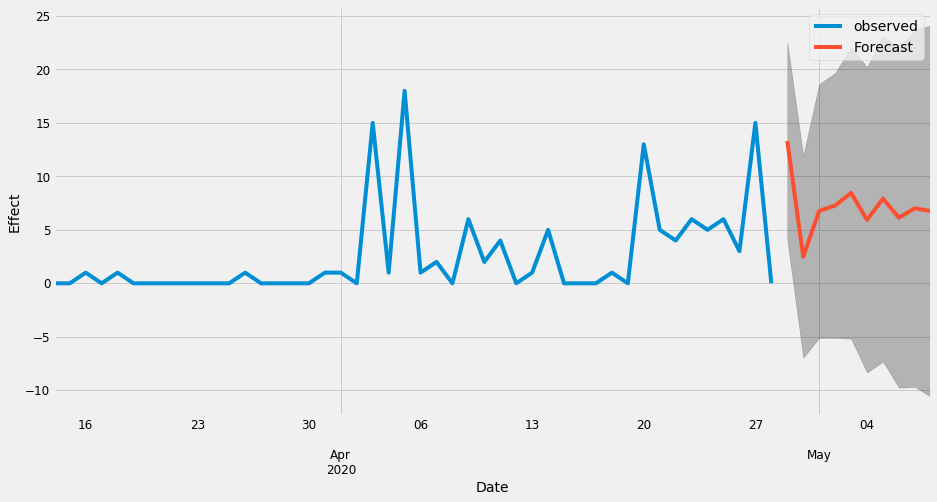

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,5,0
2020-04-25,6,1
2020-04-26,3,1
2020-04-27,15,2
2020-04-28,0,1


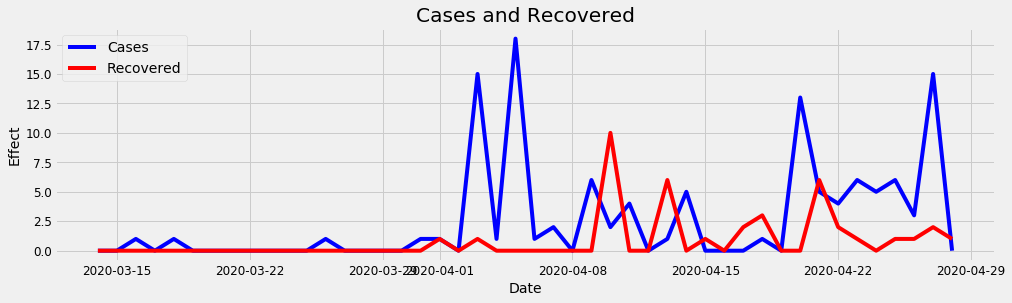

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

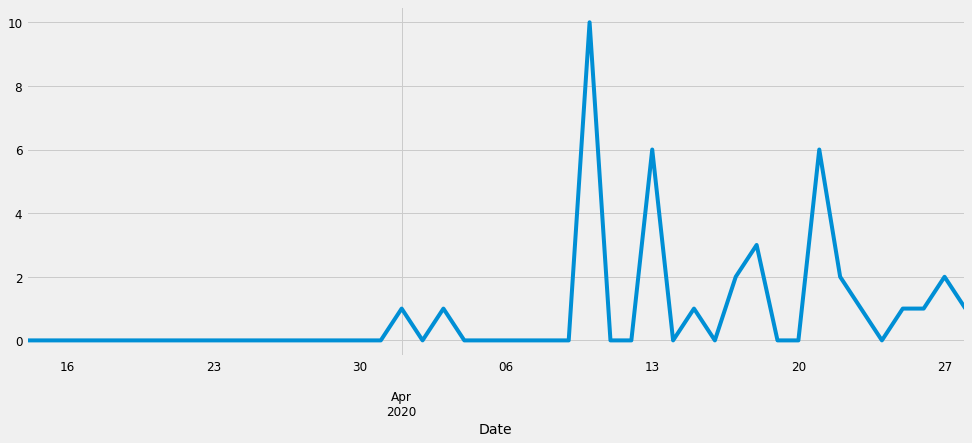

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

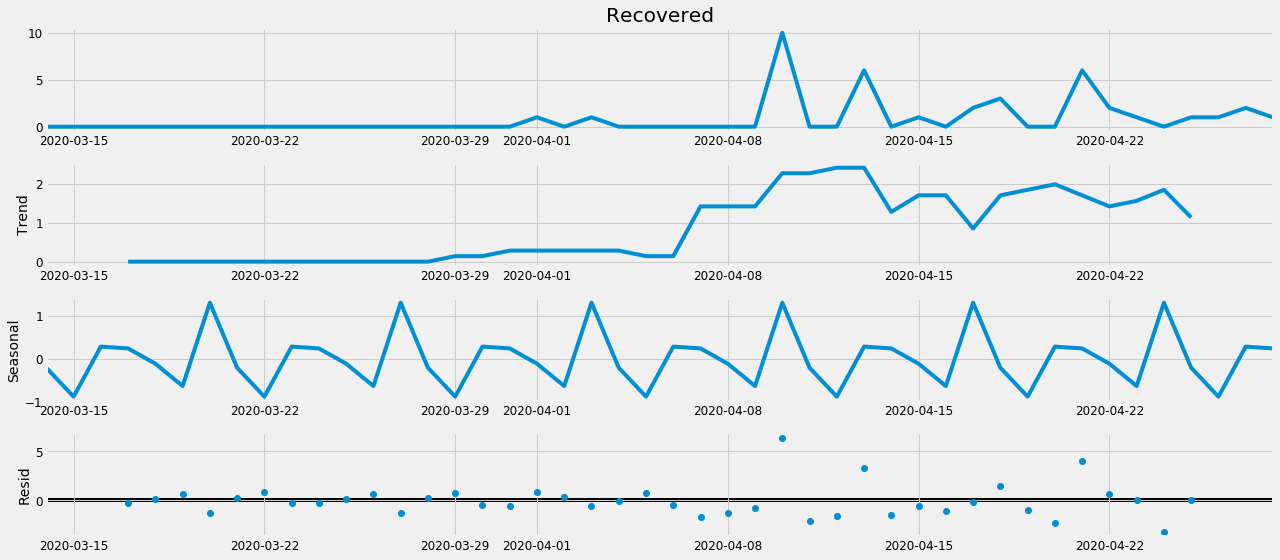

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:196.82893744412326


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1120.356974170195
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:164.89066921907022
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:109.15765719750297
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:159.20213960366976


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1189.0755179561943
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:113.66247077863815
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:109.61427898311248
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:194.85939536352993


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:807.9731639253581
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:161.7600368620044
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:107.18878662890796
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:161.17255354087885


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:898.7920239997645
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:115.63703288255189
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:107.47618060342165
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:217.9854116072662


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:952.1421384650782
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:188.82514841105052
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:119.188936979269
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:175.46079165423743


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:954.5450311767986
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:122.14621743291374
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:117.13700753241241
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:185.4575990381833


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:913.2526726425
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:160.13598538820395
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:101.14152121045741
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:154.3203301791062


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:801.4660622955506
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:108.74233882378577
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:101.26565960755627
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:198.11667186124396
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1243.7194814607008


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:165.57913318593205
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:111.1525726777688
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:157.58865011558797


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1337.3036687393003
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:111.6261230841719
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:111.56542177808456
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:191.2301363557717
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:nan


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:163.65188210448412
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:109.18733669260162
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:156.14708873261023
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2027.7990290637763


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:112.55331145578133
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:108.8966066249758
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:208.0284787387147


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:922.2137162707088
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:177.6975048480943
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:114.68545872426353
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:164.38062198361473


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:806.7490465120596
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:114.28088457809415
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:114.47117876910502
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:186.18906421011283


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:814.7569146634521
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:160.33663538427533
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:102.26031401641967
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:151.76225933837372


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:702.9646419663359
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:105.3951323533075
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:102.87089759646469


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2117      0.546     -0.388      0.698      -1.282       0.859
ma.L1         -1.0000   2705.395     -0.000      1.000   -5303.477    5301.477
ma.S.L12      -1.0000   6573.200     -0.000      1.000   -1.29e+04    1.29e+04
sigma2         5.3772   4.06e+04      0.000      1.000   -7.95e+04    7.95e+04


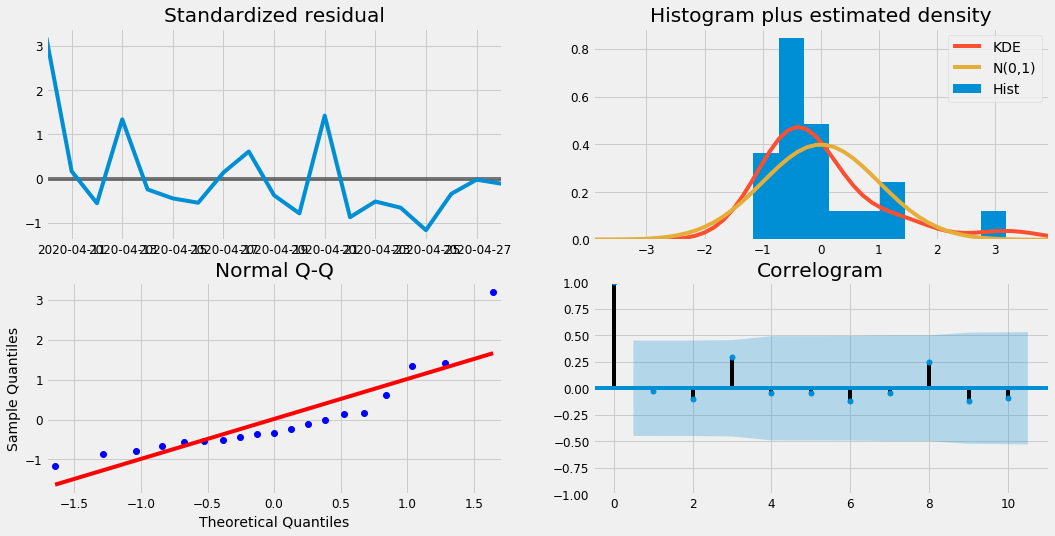

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

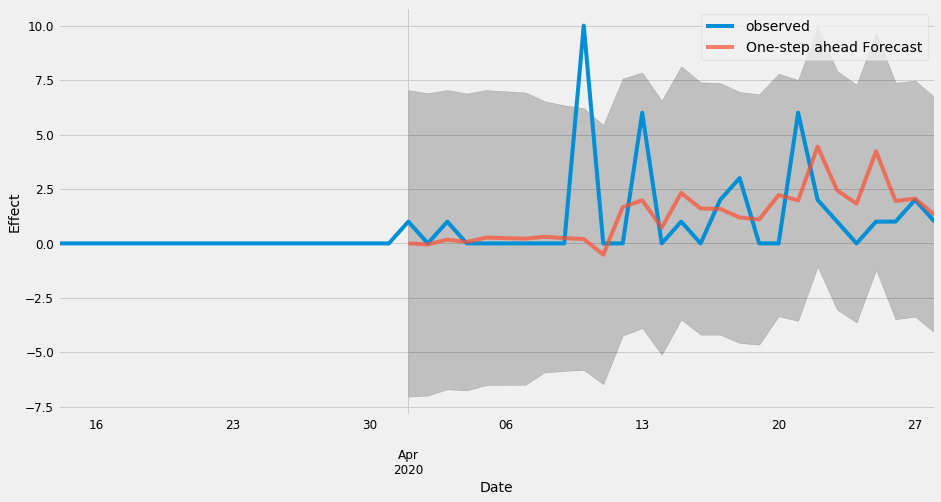

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 6.09


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 2.47


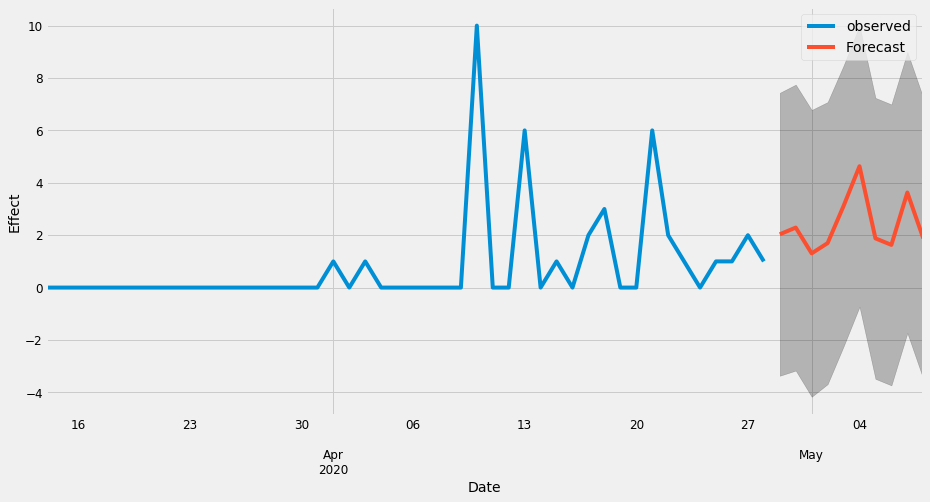

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

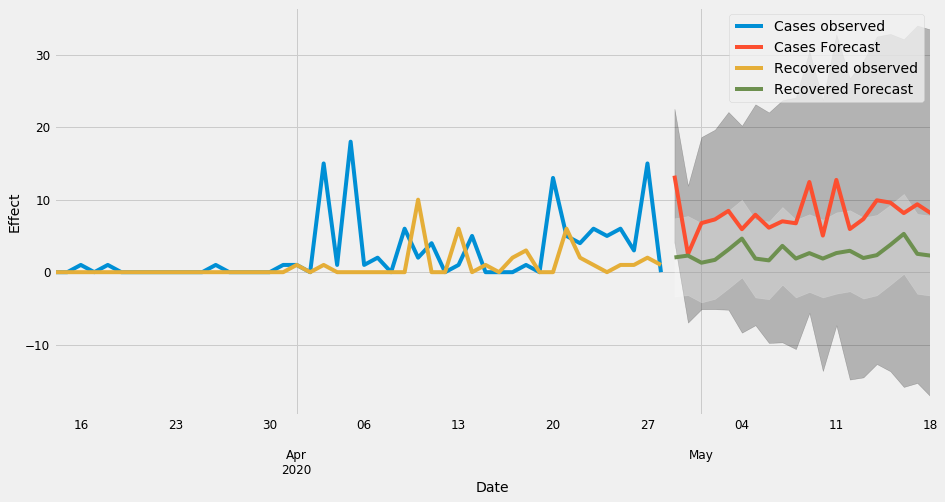

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

13

In [33]:
int(min(cases_result_date[0]))

2

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-30


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-04


In [ ]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

In [ ]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()